In [1]:
import pandas as pd

In [2]:
data_2 = pd.read_csv("pct_change.csv").dropna(how="all").dropna(axis=1,how="all")
data_1 = pd.read_csv("pPPIF_Motif_Insertions_2022-03-14_V3_diff_in_log_counts_preds_with_percentage.csv").dropna(how="all").dropna(axis=1,how="all")
#data_1 = pd.read_csv("pPPIF_Motif_Insertions_2022-03-14_V3_diff_in_jsd_preds.csv").dropna(how="all").dropna(axis=1,how="all")






In [3]:
data_1.shape

(43, 10)

In [4]:
data_2.head

<bound method NDFrame.head of        N        Motif              Edit_Type Insertion_Sequence  \
0    0.0     WildType               WildType                NaN   
1    1.0          YY1        Consensus_Motif           AAGATGGC   
2    2.0        GABPA        Consensus_Motif           ACCGGAAG   
3    3.0         ETS1        Consensus_Motif           CAGGAAGT   
4    4.0          NFY        Consensus_Motif           CCAATCAG   
5    5.0         NRF1        Consensus_Motif           GCGCATGC   
6    6.0         SPI1        Consensus_Motif           GAGGAAGT   
7    7.0        GATA3        Consensus_Motif           AGATAAGA   
8    8.0          MYC        Consensus_Motif           CCACGTGC   
9    9.0       FOSJUN        Consensus_Motif           TGAGTCAT   
10  10.0       ZBTB11        Consensus_Motif           CCGGAAGT   
11  11.0         REST        Consensus_Motif           ACCATGGA   
12  12.0      YY1swap  Dinucleotide_Swap_Ctl           AAGTAGGC   
13  13.0    GABPAswap  Dinucleot

In [5]:
data_n = data_1.merge(data_2, on=["Motif", "Edit_Type"]).dropna(subset=["pct_change"])

In [6]:
data_n.shape

(42, 17)

Text(0, 0.5, 'Observed')

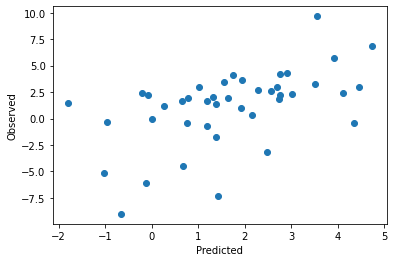

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data_n["diff_in_logcounts_preds_percentage_change"].values, data_n["pct_change"].values)
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [8]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [9]:
spearmanr(data_n["diff_in_logcounts_preds_percentage_change"].values, data_n["pct_change"].values)

SpearmanrResult(correlation=0.58739162142452, pvalue=4.323593630775728e-05)

In [10]:
pearsonr(data_n["diff_in_logcounts_preds_percentage_change"].values, data_n["pct_change"].values)

(0.5328550444542435, 0.0002802405716272363)

In [11]:
import numpy as np
spearmanr(np.abs(data_n["diff_in_logcounts_preds_percentage_change"].values), np.abs(data_n["pct_change"].values))

SpearmanrResult(correlation=0.25111417227129085, pvalue=0.10868866472089951)

In [12]:
pearsonr(np.abs(data_n["diff_in_logcounts_preds_percentage_change"].values), np.abs(data_n["pct_change"].values))

(0.2030744758036667, 0.19710469980445042)

In [13]:
uniq_motifs = list(set(data_n[data_n["Edit_Type"]=="Consensus_Motif"]["Motif"]))

(42, 17)


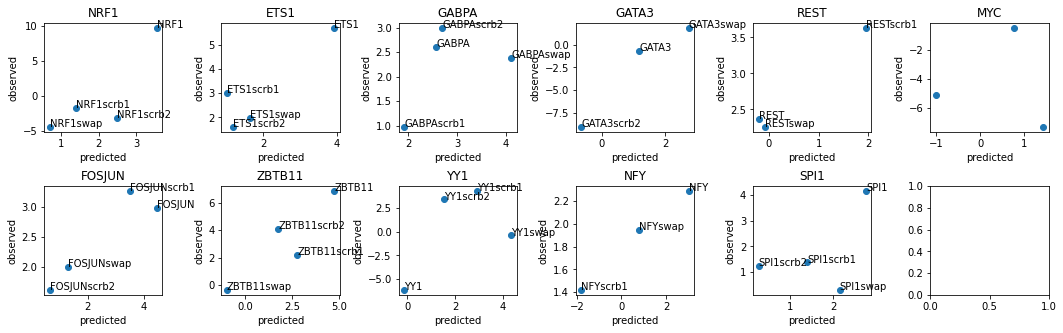

In [14]:
fig, axs = plt.subplots(2,6,figsize=(18, 5))

row=0
print(data_n.shape)
for i in range(len(uniq_motifs)):
    preds = []
    observed = []
    names = []
    for j in range(data_n.shape[0]):
        try:
            data_n.loc[j,"Motif"]
        except:
            continue
        if uniq_motifs[i] in data_n.loc[j,"Motif"]:
            #print(uniq_motifs[i],data_n.loc[j,"Motif"])
            preds.append(data_n.loc[j,"diff_in_logcounts_preds_percentage_change"])
            observed.append(data_n.loc[j,"pct_change"])
            names.append(data_n.loc[j,"Motif"])
    
    axs[row,i%6].scatter(preds, observed)
    axs[row,i%6].set_title(uniq_motifs[i])
    axs[row,i%6].set_xlabel("predicted")
    axs[row,i%6].set_ylabel("observed")
    
    
    if i==5:
        row=1
        
    for l, txt in enumerate(names):
        axs[row,i%6].annotate(txt, (preds[l], observed[l]))

fig.subplots_adjust(wspace=0.5, hspace=0.5)
#fig.tight_layout()